In [1]:
import numpy as nump 
import math 
import pandas as pan #reading lines from csv file intp an array later 
import os 
import glob # getting the csv files which are stored in the same folder
import tkinter as tkin
from tkinter import filedialog
import matplotlib.pyplot as plt 

import ruptures as rpt
from scipy.signal import savgol_filter

In [3]:
root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
my_csv_files = glob.glob(os.path.join(work, "*.csv")) # identifies the csv files in this directory
print(my_csv_files)

[]


D:\0,5,60min_aTAT_25.10.2022_DONE\60Min_tax\Neuer Ordner (13)\Values_Plot of Acquired-60Min_tax-34_alphatub_647.csv
D:\0,5,60min_aTAT_25.10.2022_DONE\60Min_tax\Neuer Ordner (13)\Values_Plot of Acquired-60Min_tax-35_acetyltub_488.csv


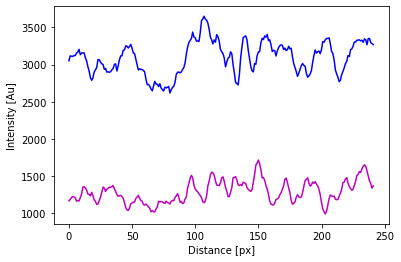

In [709]:
#opening and writing the csv.files (from the Plotprofile from IMAGE J) to panda dataframe 
for l in range(len(my_csv_files)):
    if "Kopie" not in my_csv_files[l]:
        #later insert code for title search 
        if "Values_Plot" and "alphatub" in my_csv_files[l]:
            print(my_csv_files[l])
            Data_568=pan.read_csv(my_csv_files[l],sep=',',encoding = 'unicode_escape')# using panda for reading the csv file in Dataframe
            plt.plot(Data_568.iloc[:,0],Data_568.iloc[:,1], c="b")# kept the Code with 568 even now alphatub is 647 BUT since it is looking for alphatub to write still works 
            #Data_568.iloc[:,0] is x-Data and Data_568.iloc[:,1] is y-data from panda frame 
            array_568=Data_568.to_numpy() # array_568 contains the alphatubulin Data from the Lineprofile over a single MT 
            #print(Data_568)
            #print(array_568)
            #print(Data_568.iloc[:,1])
        elif "Values_Plot" and "acetyl" in my_csv_files[l]:
            print(my_csv_files[l])
            Data_488=pan.read_csv(my_csv_files[l],sep=',', encoding = 'unicode_escape')
            plt.plot(Data_488.iloc[:,0],Data_488.iloc[:,1], c="m")  
            plt.xlabel("Distance [px]")
            plt.ylabel("Intensity [Au]")
            #plt.title("Intensity of Lineprofile of {} stabilized  Microtubule after {} min alphaTAT1 incubation".format(tax, time))
            array_488=Data_488.to_numpy()# array_488 contains the acetylated tubulin Data from the Lineprofile over a single MT 
    #print(my_csv_files[l],reading) #all the csv files in the directory with the same indetifier
#print(Data_488)
#print(Data_568)
#print(Data_568.columns)


2
0       0.0000
1       0.0454
2       0.0908
3       0.1362
4       0.1816
        ...   
237    10.7598
238    10.8052
239    10.8506
240    10.8960
241    10.9414
Name: Distance_µm, Length: 242, dtype: float64


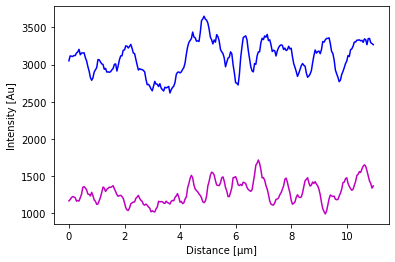

In [710]:
#converting pixel in µm 0.045400065, 22.0264 pixel/µm
Data_568["Distance_µm"] = Data_568.iloc[:,0].multiply(0.0454)
Data_488["Distance_µm"] = Data_488.iloc[:,0].multiply(0.0454)
position= Data_568.columns.get_loc("Distance_µm")
position_488= Data_488.columns.get_loc("Distance_µm")#
array_488_um=Data_488.to_numpy()
array_568_um=Data_568.to_numpy()
#print(position)
print(position_488)
#Data_568.iloc[:,3] = Data_568.iloc[:,0].multiply(0.0454)
print(Data_568.iloc[:,position])
#print(array_488_um)
#print(Data_568)
fig,ax=plt.subplots()
ax.plot(Data_488.iloc[:,2],Data_488.iloc[:,1], c="m")
#secax = ax.secondary_yaxis('right')
#secax.set_ylabel("Intensity [Au]")
ax.set_xlabel("Distance [µm]")
ax.set_ylabel("Intensity [Au]")
ax.plot(Data_568.iloc[:,2],Data_568.iloc[:,1], c="b")# Data_568.iloc[:,2] is x-Data in µm 
plt.savefig('Mtlattice_acetylation_vs_alphatublevel.png')

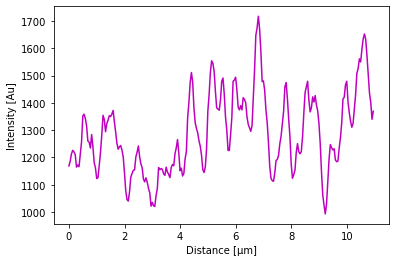

In [711]:
plt.plot(Data_488.iloc[:,2],Data_488.iloc[:,1], c="m")  
plt.xlabel("Distance [µm]")
plt.ylabel("Intensity [Au]")
plt.savefig('Mtlattice_acetylation.png')

In [712]:
leng_pix= len(array_488_um[:,0])
leng_um=float(array_488_um[leng_pix-1:leng_pix,2]-array_488_um[0:1,2])
s_leng_um=str(leng_um)
print(leng_pix)
print(leng_um)
print(s_leng_um)

242
10.941400000000002
10.941400000000002


In [713]:
#integral = nump.trapz(array_488[:,1], array_488[:,0])
#print(integral) 

#NOT USING the integrals for the later calculation 
integral_alpha = nump.trapz(array_568_um[:,1], array_568_um[:,0])
print("Integral alphatub:",integral_alpha) 

integral_acetyl= nump.trapz(array_488_um[:,1], array_488_um[:,0])
print("Integral acetyltub:",integral_acetyl) 


#USING the SUM over the y-values [Au] from the intensity profiles 
Summe_acetyl=nump.sum(array_488[:,1])
print("Summe 488, acetyl:", Summe_acetyl)

Summe_alpha=nump.sum(array_568[:,1])
print("Summe 568, alpha:", Summe_alpha)


Integral alphatub: 744815.9184999999
Integral acetyltub: 311106.4715
Summe 488, acetyl: 312375.44200000004
Summe 568, alpha: 747974.3470000001


In [714]:
# creating values for diagramm 
# Remember kept here 568 for alphatubulin values and 488/48 for acetyltubulin values 

y48_value= Summe_acetyl
print(y48_value)
x48_value= 60 #time 
print("y488:",y48_value, "x488:", x48_value)

#converting to string to easier write it later in new file 
string48_y= str(y48_value)
string48_x=str(x48_value)+","
print(string48_y, string48_x)

y568_value= Summe_alpha
x568_value= 60 #time 
print("y568:",y568_value, "x568:", x568_value)

#converting to string to easier write it later in new file 
string568_y= str(y568_value)
string568_x=str(x568_value)+","
print(string568_y, string568_x)

# Calculating the RATIO: Sum acetyl[Au]/Sum alpha[Au]

y_sumAC_sumAL= y48_value/y568_value
string_sumdiv_y= str(y_sumAC_sumAL)

#ratio_acetyl_div_leng_um= y_sumAC_sumAL/leng_um 
#string_ac_leng= str(ratio_acetyl_div_leng_um)
print(string_sumdiv_y)
#print(string_ac_leng)

312375.44200000004
y488: 312375.44200000004 x488: 60
312375.44200000004 60,
y568: 747974.3470000001 x568: 60
747974.3470000001 60,
0.4176285500336819


#Collecting  SUM alpha and acetyl (AUC) 0 minutes from all samples and save in file 
#calculate the mean value for each and then substract this mean value for the other MT files 
mean_0_SUM_acetyl_div_length=...
mean_0_SUM_alpha_div_length= ...

acetyl_value=(Summe_acetyl/leng_um)-mean_0_SUM_acetyl_div_length
alpha_value= (Summe_a/leng_um)-mean_0_SUM_alpha_div_length
total_value= acetyl_value/alpha_value 

root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
f = open('normalized_AUC_values', 'a')
f.write(string48_x)
f.write(total_value+",")
f.write(alpha_value +",")
f.write(acetyl_value+"\n")

#good pracitice
f.close()


In [715]:
# saving values sum acetyl/sum alpha normalized over length MT  in a file to open later again and do statistical analysis
root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
f = open('SUMAcetyl_DIV_SUMAlpha_for_timepoints_60min_tax_25_10', 'a')

#f = open('AUC_lengthMT_for_timepoints', 'w')

f.write(string48_x)
f.write(string_sumdiv_y+",")
f.write(s_leng_um+"\n")

#good pracitice
f.close()

#JUST UNTIL HERE IMPORTANT FOR THE VALUE CALCULATION; BELOW IS JUST THE CODE FOR PLOTTING 


   Time(min)   AUC acetyl/AUC alpha tub 
0          0                    0.118463
1          5                    0.188682
2         10                    0.316106
3         20                    0.515420
4         60                    0.701663


Text(0.5, 1.0, 'Taxol treated Microtubules: Area under the curve of the Intensity acetylated tubulin/alpha tubulin normalized by Microtubule length')

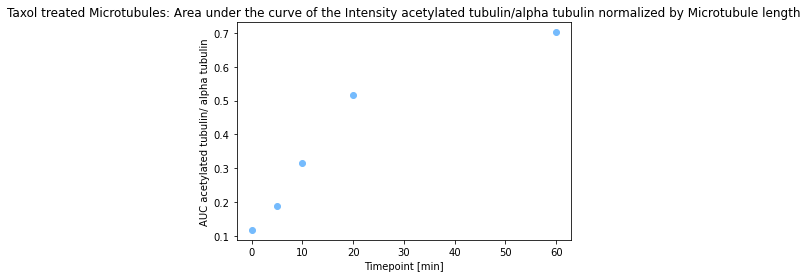

In [397]:

fig.tight_layout()
SUM_acetDIValpha=pan.read_csv('C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\SUMAcetyl_DIV_SUMAlpha_for_timepoints_taxol.csv',sep=',',encoding = 'unicode_escape')# using panda for reading the csv file in Dataframe
print(SUM_acetDIValpha)
plt.plot(SUM_acetDIValpha.iloc[:,0],SUM_acetDIValpha.iloc[:,1], c='xkcd:sky blue', marker="o", ls='None')  
plt.xlabel("Timepoint [min]")
plt.ylabel("AUC acetylated tubulin/ alpha tubulin")
plt.title("Taxol treated Microtubules: Area under the curve of the Intensity acetylated tubulin/alpha tubulin normalized by Microtubule length")

           

    ï»¿Time  Ratio_acetylation  length[um]
0         0           0.081323      7.0824
1         0           0.101381      6.4922
2         0           0.114297      4.5854
3         0           0.050002      2.9964
4         0           0.097081      4.2222
5         0           0.049105      4.9486
6         0           0.085896      4.4946
7         0           0.086681     10.2150
8         0           0.080139      7.4002
9         0           0.089660     10.5782
10        0           0.127991      5.9474
11        0           0.071157     10.1242
12        0           0.059019      7.2640
0     0.081323
1     0.101381
2     0.114297
3     0.050002
4     0.097081
5     0.049105
6     0.085896
7     0.086681
8     0.080139
9     0.089660
10    0.127991
11    0.071157
12    0.059019
Name: Ratio_acetylation, dtype: float64
    ï»¿Time  Acetylation Ratio  length[um]
0         0           0.183836      3.6320
1         0           0.082756      5.3572
2         0           0.119501    

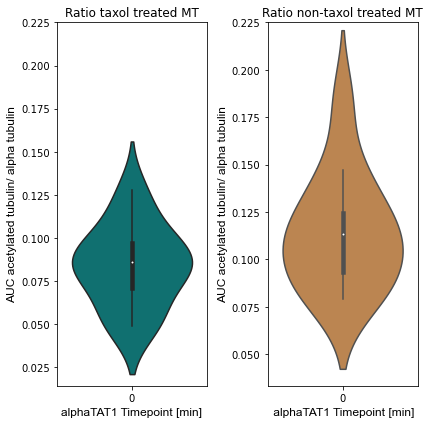

In [248]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sea

data_R=pan.read_csv(r"C:\Users\Clara\Documents\Universiteit Utrecht\Major internship\Python_data_analyis_csv\20.10.2022_Data_0,5,10\SUMAcetyl_DIV_SUMAlpha_for_timepoints_with_taxol_0Min.csv",sep=',',encoding = 'unicode_escape')#,sep=',',encoding = 'unicode_escape')# using panda for reading the csv file in Dataframe
print(data_R)
#plt.plot(data.iloc[:,0],data.iloc[:,1])
Time=data_R.iloc[:,0]
Ratios=data_R.iloc[:,1]
print(Ratios)

fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax= sea.violinplot(x=Time, y=Ratios, data=data_R, color='teal', inner='box')
ax.set_ylim(top=0.225)
#ax.set_title("Ratio acetylated tubulin to α tubulin taxol treated MT (right) and additional SIRT2 treatment (left)")
ax.set_title("Ratio taxol treated MT")
ax.set_ylabel('AUC acetylated tubulin/ alpha tubulin',fontname="Arial", fontsize=12)
ax.set_xlabel('alphaTAT1 Timepoint [min]',fontname="Arial", fontsize=12)
fig.tight_layout()

data_R2=pan.read_csv(r"C:\Users\Clara\Documents\Universiteit Utrecht\Major internship\Python_data_analyis_csv\20.10.2022_Data_0,5,10\SUMAcetyl_DIV_SUMAlpha_for_timepoints_without_taxol_0Min.csv",sep=',',encoding = 'unicode_escape')#,sep=',',encoding = 'unicode_escape')# using panda for reading the csv file in Dataframe
print(data_R2)
#plt.plot(data.iloc[:,0],data.iloc[:,1])
Time_T=data_R2.iloc[:,0]
Ratios_T=data_R2.iloc[:,1]
print(Ratios_T)


ax = fig.add_subplot(gs[0, 1])
ax= sea.violinplot(x=Time_T, y=Ratios_T, data=data_R2, color='peru', inner= 'box')
ax.set_ylim(top=0.225)
ax.set_title("Ratio non-taxol treated MT")
ax.set_ylabel('AUC acetylated tubulin/ alpha tubulin',fontname="Arial", fontsize=12)
ax.set_xlabel(' alphaTAT1 Timepoint [min]',fontname="Arial", fontsize=12)
fig.tight_layout()
#plt.show()
root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
plt.savefig('Violinplot_Ratio_AUC_acetyltub_over_alphatub_0Min_(left)taxol_(right)_wo_boxinner_2.png')

In [30]:
#subtract 0Min acetylation for other timepoints
meanvalue_0=0.088
meanvalue_tax_0=0.150

Data_Ratio_tax=pan.read_csv(r"C:\Users\Clara\Documents\Universiteit Utrecht\Major internship\Python_data_analyis_csv\07.10.2022_Data\SUMAcetyl_DIV_SUMAlpha_for_timepoints_with_taxol_10Min_07_10.csv",sep=',',encoding = 'unicode_escape')
Data_Ratio=pan.read_csv(r"C:\Users\Clara\Documents\Universiteit Utrecht\Major internship\Python_data_analyis_csv\07.10.2022_Data\SUMAcetyl_DIV_SUMAlpha_for_timepoints_without_taxol_10Min_07_10.csv",sep=',',encoding = 'unicode_escape')
#print(Data_Ratio)
#print(Data_Ratio_tax) 

Data_Ratio["Ratio_normalized_0"] = Data_Ratio.iloc[:,1].divide(meanvalue_0)
Data_Ratio_tax["Ratio_normalized_0"] = Data_Ratio_tax.iloc[:,1].divide(meanvalue_tax_0)

print("without_taxol:", Data_Ratio)
print("with_taxol:", Data_Ratio_tax)

position_Ratio= Data_Ratio.columns.get_loc("Ratio_normalized_0")#
position_Ratio_tax= Data_Ratio_tax.columns.get_loc("Ratio_normalized_0")#

array_Ratio=Data_Ratio.to_numpy()
array_Ratio_tax=Data_Ratio_tax.to_numpy()


#print(position)
print(position_Ratio)
#Data_568.iloc[:,3] = Data_568.iloc[:,0].multiply(0.0454)
#print(Data_Ratio.iloc[:,position_Ratio])
#print(Data_Ratio_tax.iloc[:,position_Ratio_tax])
#print(array_488_um)
#print(Data_568)


without_taxol:     ï»¿Time   Ratio_Acetyl  Ratio_normalized_0
0        10       0.157340            1.787951
1        10       0.151023            1.716167
2        10       0.181932            2.067413
3        10       0.177039            2.011802
4        10       0.168567            1.915540
5        10       0.196640            2.234548
6        10       0.227752            2.588094
7        10       0.197725            2.246877
8        10       0.210673            2.394012
9        10       0.180330            2.049206
10       10       0.150736            1.712904
11       10       0.195677            2.223607
12       10       0.172810            1.963747
13       10       0.255439            2.902720
14       10       0.261606            2.972799
15       10       0.171981            1.954331
16       10       0.234688            2.666904
17       10       0.231941            2.635688
18       10       0.236068            2.682594
19       10       0.151267            1.71894

taxol MT 0     1.344735
1     1.187680
2     1.634467
3     1.661197
4     1.488022
5     1.286825
6     1.841247
7     1.183179
8     1.513726
9     1.298337
10    1.724044
11    1.550888
12    1.391818
13    1.618829
14    1.315804
15    1.320564
16    1.246602
17    1.415548
18    1.875228
19    1.172474
20    1.162866
21    1.480176
22    1.547391
23    1.413651
24    1.737926
Name: Ratio_normalized_0, dtype: float64
nontaxolMT 0     1.787951
1     1.716167
2     2.067413
3     2.011802
4     1.915540
5     2.234548
6     2.588094
7     2.246877
8     2.394012
9     2.049206
10    1.712904
11    2.223607
12    1.963747
13    2.902720
14    2.972799
15    1.954331
16    2.666904
17    2.635688
18    2.682594
19    1.718947
20    1.969246
21    2.120829
22    2.112912
23    2.230216
24    2.021899
Name: Ratio_normalized_0, dtype: float64


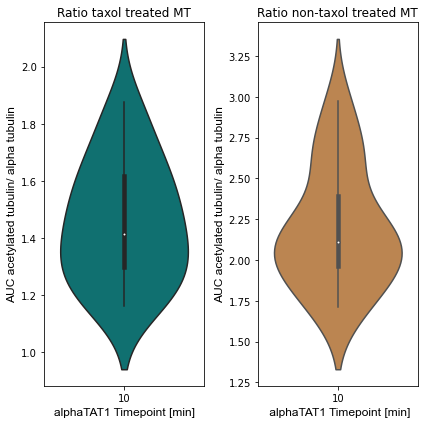

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sea

#plt.plot(data.iloc[:,0],data.iloc[:,1])
data_R= Data_Ratio_tax #Dataset MT with taxol treatment normalized to 0Min mean acetylation value control 
Time=data_R.iloc[:,0]
Ratios=data_R.iloc[:,2]
print("taxol MT", Ratios)

fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax= sea.violinplot(x=Time, y=Ratios, data=data_R, color='teal', inner='box')
ax.set_title("Ratio taxol treated MT")
ax.set_ylabel('AUC acetylated tubulin/ alpha tubulin',fontname="Arial", fontsize=12)
ax.set_xlabel('alphaTAT1 Timepoint [min]',fontname="Arial", fontsize=12)
fig.tight_layout()

data_R2=Data_Ratio #Dataset Mt without taxol treatment normalized to 0Min mean acetylation value control
Time_T=data_R2.iloc[:,0]
Ratios_T=data_R2.iloc[:,2]
print("nontaxolMT",Ratios_T)


ax = fig.add_subplot(gs[0, 1])
ax= sea.violinplot(x=Time_T, y=Ratios_T, data=data_R2, color='peru', inner= 'box')
ax.set_title("Ratio non-taxol treated MT")
ax.set_ylabel('AUC acetylated tubulin/ alpha tubulin',fontname="Arial", fontsize=12)
ax.set_xlabel(' alphaTAT1 Timepoint [min]',fontname="Arial", fontsize=12)
fig.tight_layout()
#plt.show()
root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
plt.savefig('Normalized_0_Violinplot_Ratio_AUC_acetyltub_over_alphatub_10Min_(left)taxol_(right)_wo_boxinner.png')